In [1]:
import matplotlib.pyplot as plt

import numpy as np

from typing import Callable

### First order differential equation

$$
\frac{dy}{dt} = f(t, y)
$$

with initial value

$$
y(t_0) = y_0
$$

### Euler Method

$$
h = t_{n+1} - t_{n}
$$

**Step size: do not need to be uniform!**

$$
f_n = f(t_n, y_n)
$$

**Approximation of the slope**

$$
y_{n+1} = y_n + f_n\cdot h
$$

In [14]:
def f1(x):
    return x**2

def f2(x, y):
    return x**2 + y**2

def f3(x, y, z):
    return x**2 + y**2 + z**2

In [22]:

# Closure, high order function
def g(f):
    def out(*arg):
        return f(*arg) + 2.0
    
    return out

In [31]:
# Forward Euler method
def Euler(f: Callable[..., np.float32], init: float, T: float, dt: float):
    t = np.arange(0, T + dt, dt)
    nt = t.shape[0]
    y = np.zeros(nt)
    
    # initial condition
    y[0] = init

    for n in range(nt - 1):
        y[n + 1] = y[n] + f(t[n], y[n]) * dt

    return t, y

In [34]:
def RK3(f, init, T, dt):
    t = np.arange(0, T + dt, dt)
    nt = t.shape[0]
    y = np.zeros(nt)

    y[0] = init

    for n in range(nt - 1):
        k1 = f(t[n], y[n])
        k2 = f(t[n] + 0.5 * dt, y[n] + 0.5 * dt * k1)
        k3 = f(t[n + 1], y[n] - dt * k1 + 2 * dt * k2)
        y[n + 1] = y[n] + (k1 + 4 * k2 + k3) * dt / 6

    return t, y

In [ ]:
class RungeKutta:

    def __init__(self, r, butcher): # method
        self.r = r
        
        self.lamba_
        self.b
        self.c
    
    def solve(f, init, T, dt):
        t = np.arange(0, T + dt, dt)
        nt = t.shape[0]
        y = np.zeros(nt)

        y[0] = init

        for n in range(nt - 1):
            self.step()

        return t, y
    
    def step():
        pass
    
    
RK2 = RungeKutta(butcher)
RK2.solve(f, init, T, dt)

object orientated

RK

RK2, RK3, Kutta, Classical RK, ...... 

## Example 1

Consider the problem

$$
\frac{dy}{dt} = 3 - 2t - 0.5y
$$

with

$$
y(0) = 1
$$

Use **Euler method** with step size $h=0.2$ to find solution at $t=0.2, 0.4, 0.6, 0.8$

Exact solution:

$$
y = 14 - 4t - 13e^{-t/2}
$$

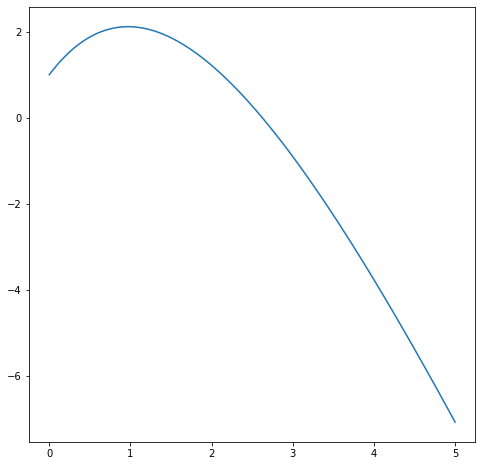

In [27]:
t = np.linspace(0, 5.0, 200)

plt.figure(figsize=(8, 8))
plt.plot(t, 14 - 4 * t - 13 * np.exp(-t / 2))

**Euler method**:

$$
y_0 = 1
$$

and

$$
y_{n+1} = y_n + (3 - 2t_n - 0.5y_n)h
$$

In [40]:
def f1(t, y):
    return 3 - 2 * t - 0.5 * y

h = 0.1

In [41]:
%time t_num, y_num = Euler(f1, 1.0, 5.0, h)
%time t_rk, y_rk = RK3(f1, 1.0, 5.0, h)

CPU times: user 159 µs, sys: 43 µs, total: 202 µs
Wall time: 119 µs
CPU times: user 227 µs, sys: 61 µs, total: 288 µs
Wall time: 206 µs


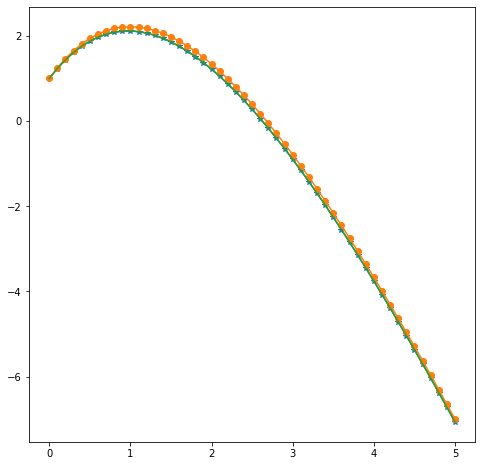

In [42]:
plt.figure(figsize=(8, 8))
plt.plot(t_rk, y_rk, '-*', t_num, y_num, "-o", t, 14 - 4 * t - 13 * np.exp(-t / 2))

### Convergence

In [43]:
t = 5.0

14 - 4 * t - 13 * np.exp(-t / 2)

-7.067104982110685

In [51]:
list_h = [0.5, 0.2, 0.1, 0.05, 0.01, 0.001]

errors1 = []
for h in list_h:
    _, y_num = Euler(f1, 1.0, 5.0, h)
    err = np.abs(y_num[-1] - (14 - 4 * 5.0 - 13 * np.exp(-5.0 / 2)))
    errors1.append(err)


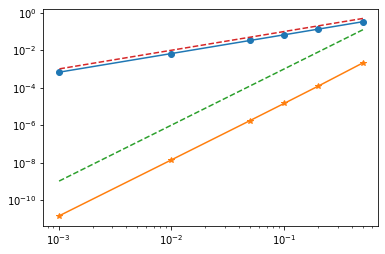

In [52]:
plt.loglog(list_h, errors1, '-o', list_h, errors, '-*', list_h, np.asarray(list_h)**3, '--', list_h, np.asarray(list_h), '--')

### Stability

$$ 0 > \lambda h > -2, \quad \lambda < 0 $$

$$ h < \frac{-2}{\lambda} $$

In [72]:
t_num, y_num = Euler(f1, 1.0, 5.0, 5)

## Example 2

Consider the problem

$$
\frac{dy}{dt} = 4 - t + 2y
$$

with

$$
y(0) = 1
$$

Use **Euler method** to solve it.

Exact solution:

$$
y = -\frac{7}{4} + \frac{1}{2}t + \frac{11}{4}e^{2t}
$$

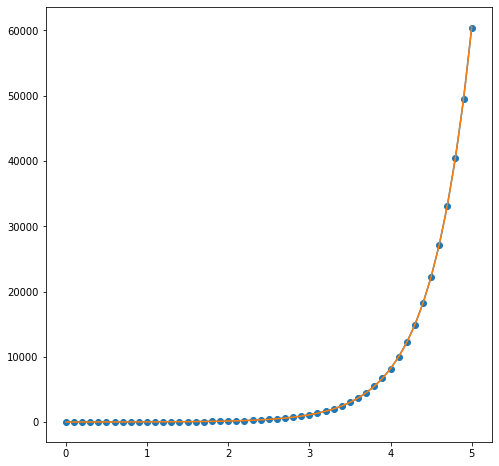

In [57]:
def f2(t, y):
    return 4 - t + 2 * y


h = 0.1

t_num, y_num = RK3(f2, 1.0, 5.0, h)

t = np.linspace(0, 5.0, 200)

plt.figure(figsize=(8, 8))
plt.plot(t_num, y_num, "-o", t, -7 / 4 + 0.5 * t + 11 / 4 * np.exp(2 * t))

In [58]:
list_h = [0.5, 0.2, 0.1, 0.05, 0.01, 0.001]

t = 5.0
ref = -7 / 4 + 0.5 * t + 11 / 4 * np.exp(2 * t)

errors = []
for h in list_h:
    _, y_num = RK3(f2, 1.0, 5.0, h)
    err = np.abs(y_num[-1] - ref)
    errors.append(err)

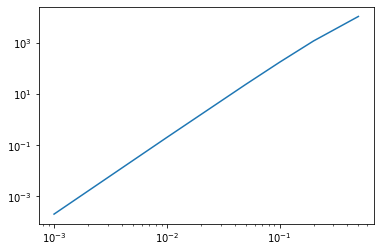

In [59]:
plt.loglog(list_h, errors)

# Example 3

$$
\frac{dy}{dx} = x^3 - \frac{y}{x}
$$

Exact solution

$$
y = \frac{1}{5} x^4 + \frac{1}{5x}
$$

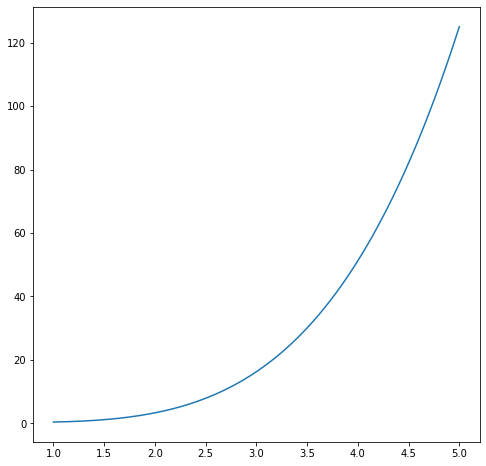

In [19]:
t = np.linspace(1.0, 5.0, 200)

plt.figure(figsize=(8, 8))
plt.plot(t, 1 / 5 * t**4 + 1 / (5 * t))

In [23]:
def f3(t, y):
    return t**3 - y / t


h = 0.1

In [24]:
%time t_num, y_num = Euler(f3, 0.4, 5.0, h)
# %time t_rk, y_rk = RK3(f3, 0.4, 5.0, h)

CPU times: user 161 µs, sys: 38 µs, total: 199 µs
Wall time: 131 µs


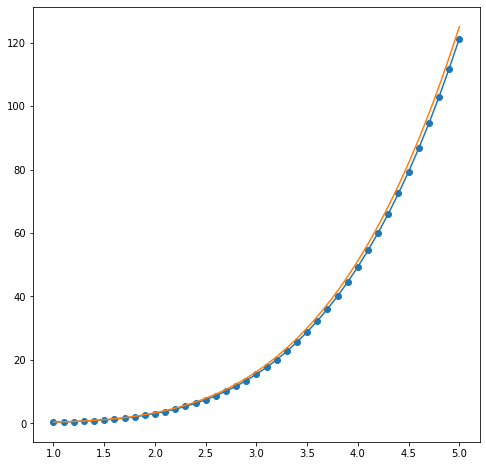

In [25]:
plt.figure(figsize=(8, 8))
plt.plot(t_num, y_num, "-o", t, 1 / 5 * t**4 + 1 / (5 * t))